In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


### Explorando os dados

In [44]:
df = pd.read_csv('Top10VideoGameStocks.csv')

df.head()

,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume
0,2000-01-01,Sony Interactive Entertainment,SONY,JPY,28.525000,29.168751,20.850000,25.299999,14.535083,147012000
1,2000-02-01,Sony Interactive Entertainment,SONY,JPY,25.293751,31.475000,25.000000,31.350000,18.010864,67437000
2,2000-03-01,Sony Interactive Entertainment,SONY,JPY,30.100000,31.299999,21.700001,28.012501,16.093437,112674000
3,2000-04-01,Sony Interactive Entertainment,SONY,JPY,28.250000,28.250000,22.312500,22.562500,12.974537,74071000
4,2000-05-01,Sony Interactive Entertainment,SONY,JPY,22.700001,23.481251,17.750000,18.237499,10.487453,65035500


In [45]:
df.info

<bound method DataFrame.info of             Date                         Company Ticker Symbol Currency  \
0     2000-01-01  Sony Interactive Entertainment          SONY      JPY   
1     2000-02-01  Sony Interactive Entertainment          SONY      JPY   
2     2000-03-01  Sony Interactive Entertainment          SONY      JPY   
3     2000-04-01  Sony Interactive Entertainment          SONY      JPY   
4     2000-05-01  Sony Interactive Entertainment          SONY      JPY   
...          ...                             ...           ...      ...   
2204  2024-06-01                        Playtika          PLTK      USD   
2205  2024-07-01                        Playtika          PLTK      USD   
2206  2024-08-01                        Playtika          PLTK      USD   
2207  2024-09-01                        Playtika          PLTK      USD   
2208  2024-10-01                        Playtika          PLTK      USD   

           Open       High        Low      Close  Adj Close     Vol

In [46]:
df.columns

Index(['Date', 'Company', 'Ticker Symbol', 'Currency', 'Open', 'High', 'Low',
       'Close', 'Adj Close', 'Volume'],
      dtype='object')

## Tratamento dos Dados

In [47]:
df.isnull().sum()

Date             0
Company          0
Ticker Symbol    0
Currency         0
Open             0
High             0
Low              0
Close            0
Adj Close        0
Volume           0
dtype: int64

In [48]:
df['Date'] = pd.to_datetime(df['Date'])

## Análise Exploratória de Dados (EDA)

In [49]:
df.describe()

,Date,Open,High,Low,Close,Adj Close,Volume
count,2209,2209.000000,2209.000000,2209.000000,2209.000000,2209.000000,2.209000e+03
mean,2013-06-10 08:01:05.187867904,56.082332,60.403246,52.123886,56.452762,54.255817,2.677228e+08
min,2000-01-01 00:00:00,0.032000,0.032000,0.025500,0.032000,0.025868,0.000000e+00
25%,2007-04-01 00:00:00,8.374000,9.225000,7.520000,8.380000,7.123526,3.879940e+07
50%,2013-11-01 00:00:00,22.362000,24.500000,20.070000,22.379999,18.641869,8.711250e+07
75%,2019-12-01 00:00:00,57.276001,61.731998,53.959999,57.459999,55.368843,3.528646e+08
max,2024-10-01 00:00:00,643.455811,714.899658,610.729919,628.245178,613.602234,3.044579e+09
std,NaN,88.552277,95.086684,82.698684,88.816897,87.529546,4.027909e+08


### Tendencia Temporal

In [50]:
df = df.sort_values(by=['Company', 'Date'])

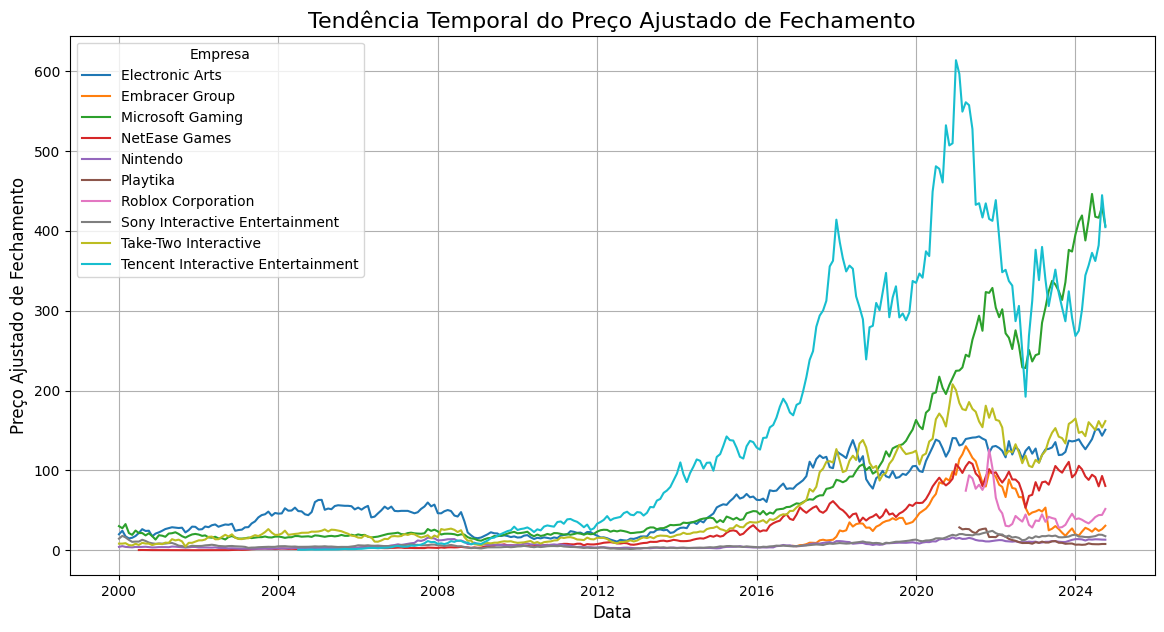

In [51]:
df['Monthly Return (%)'] = df.groupby('Company')['Adj Close'].pct_change() * 100

# Visualização das tendências de preco ajustado de fechamento
plt.figure(figsize=(14, 7))

for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Adj Close'], label=company)

plt.title('Tendência Temporal do Preço Ajustado de Fechamento', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Preço Ajustado de Fechamento', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.show()

### Comparacao entre empresas

In [52]:
# preço médio ajustado e volume médio por empresa
company_stats = df.groupby('Company').agg({
    'Adj Close': 'mean',
    'Volume': 'mean'
}).reset_index()

C:\Users\marco\AppData\Local\Temp\ipykernel_30388\4224244150.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Avg Adj Close', data=company_stats, palette='viridis')


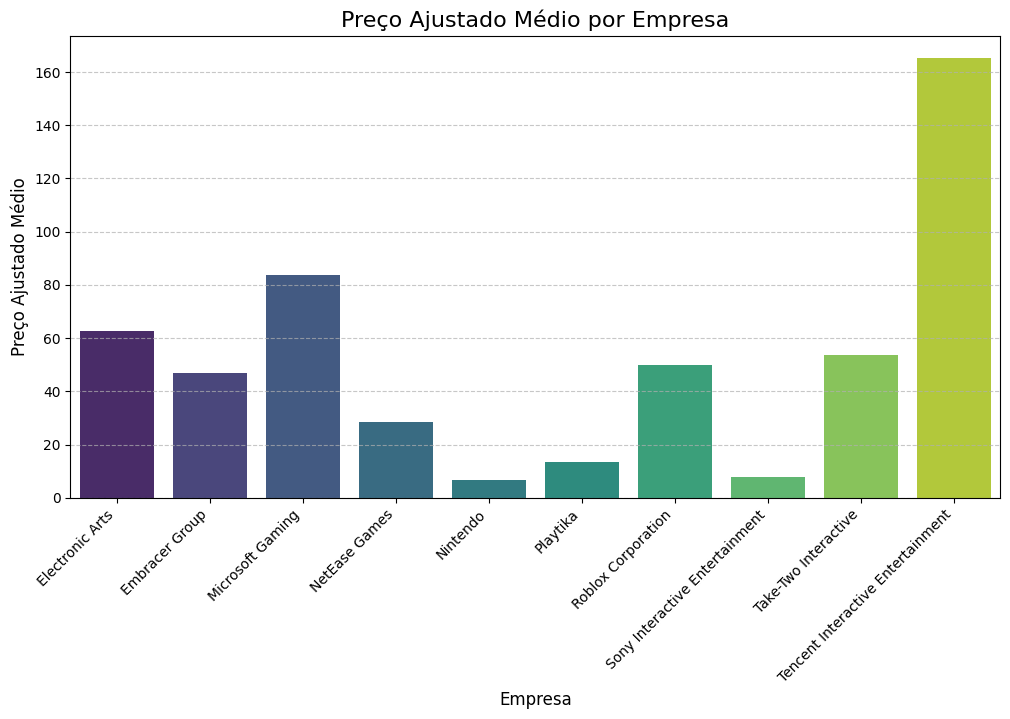

C:\Users\marco\AppData\Local\Temp\ipykernel_30388\4224244150.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Avg Volume', data=company_stats, palette='magma')


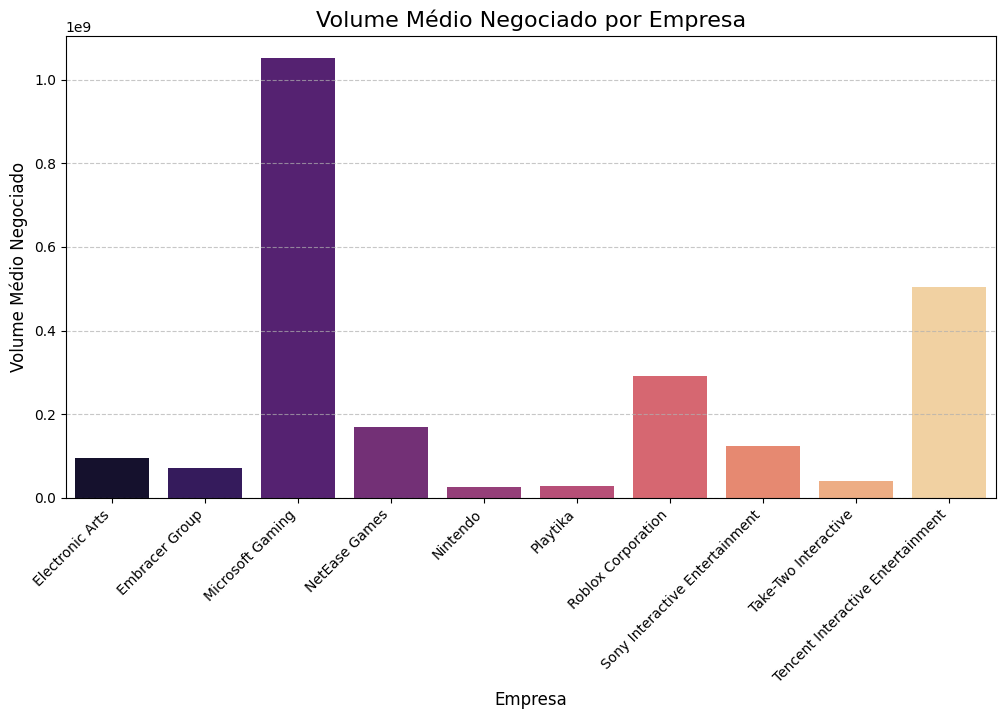

C:\Users\marco\AppData\Local\Temp\ipykernel_30388\4224244150.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Adj Close', data=df, palette='coolwarm')


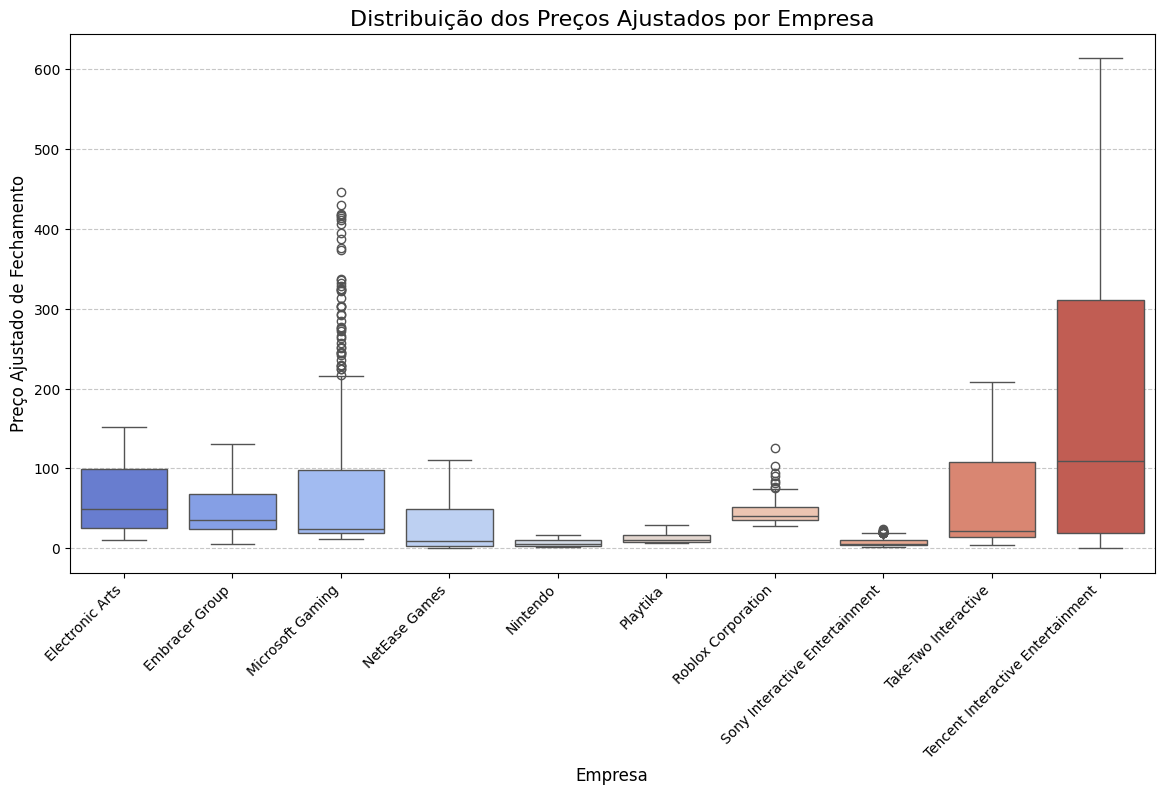

In [53]:
# Renomear colunas
company_stats.rename(columns={
    'Adj Close': 'Avg Adj Close',
    'Volume': 'Avg Volume'
}, inplace=True)

# gráficos
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Avg Adj Close', data=company_stats, palette='viridis')
plt.title('Preço Ajustado Médio por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Preço Ajustado Médio', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Avg Volume', data=company_stats, palette='magma')
plt.title('Volume Médio Negociado por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volume Médio Negociado', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(x='Company', y='Adj Close', data=df, palette='coolwarm')
plt.title('Distribuição dos Preços Ajustados por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Preço Ajustado de Fechamento', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Volatilidade

In [54]:
# 1. Volatilidade Diária - Diferença entre o preço máximo e mínimo
df['Daily Volatility'] = df['High'] - df['Low']

# 2. Volatilidade Histórica - Desvio padrão dos preços ajustados de fechamento (30 dias)
df['Rolling Volatility (30 days)'] = df.groupby('Company')['Adj Close'].rolling(window=30).std().reset_index(0, drop=True)


C:\Users\marco\AppData\Local\Temp\ipykernel_30388\303087170.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Daily Volatility', data=df, palette='coolwarm')


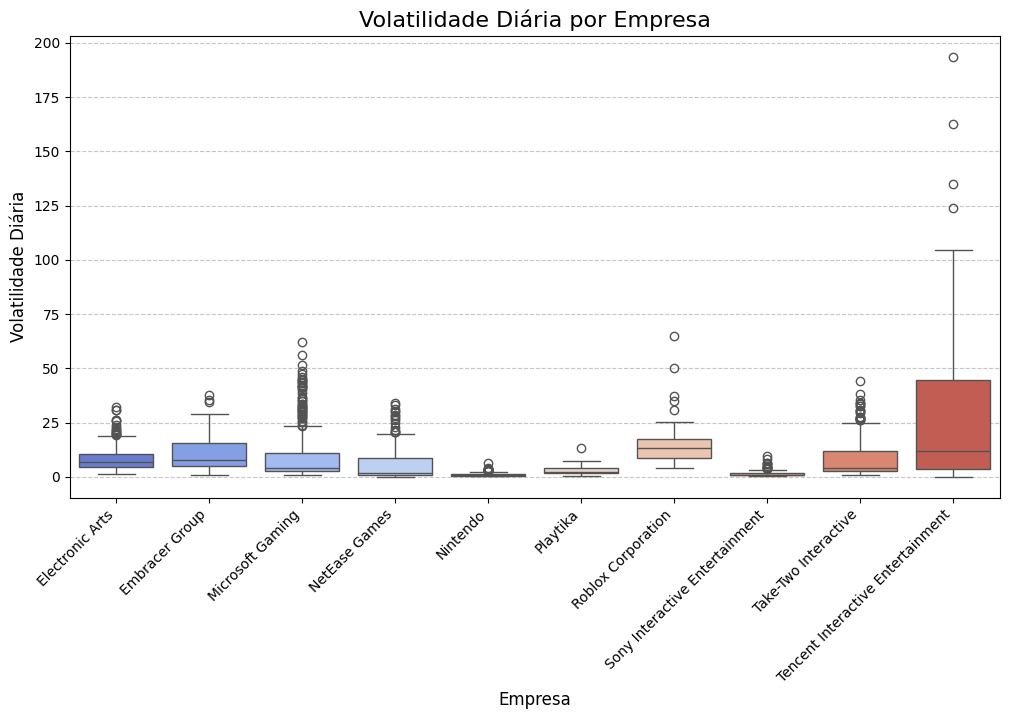

C:\Users\marco\AppData\Local\Temp\ipykernel_30388\303087170.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Rolling Volatility (30 days)', data=df, palette='magma')


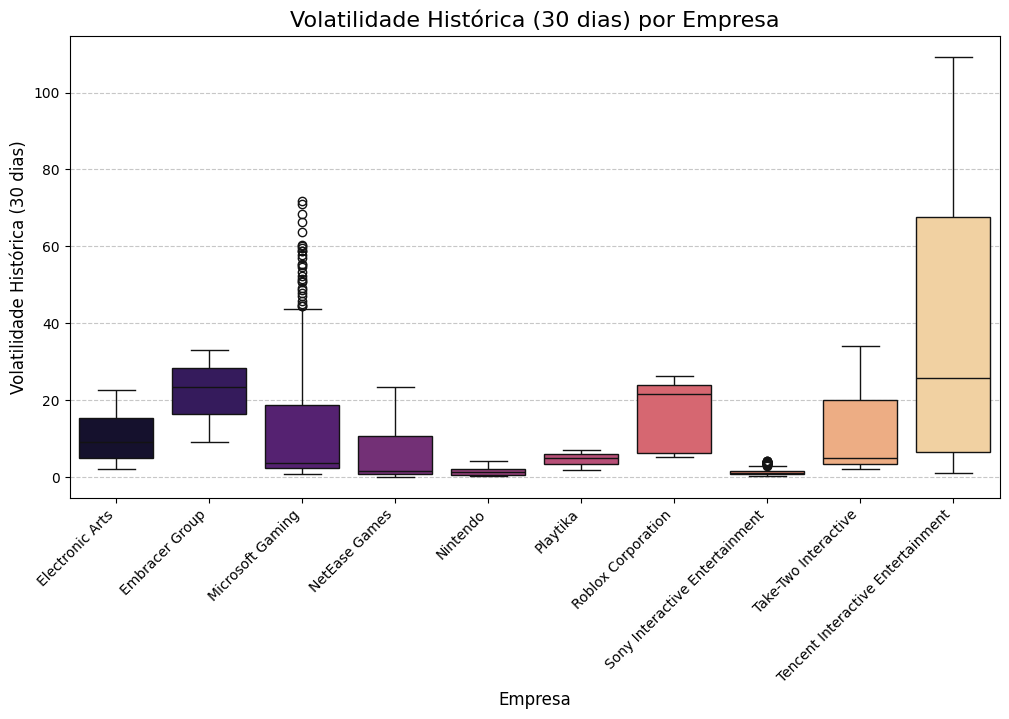

In [55]:
# Gráficos
plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Daily Volatility', data=df, palette='coolwarm')
plt.title('Volatilidade Diária por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volatilidade Diária', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='Company', y='Rolling Volatility (30 days)', data=df, palette='magma')
plt.title('Volatilidade Histórica (30 dias) por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volatilidade Histórica (30 dias)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Volume médio negociado

In [56]:
company_volume_stats = df.groupby('Company').agg({
    'Volume': 'mean'
}).reset_index()


C:\Users\marco\AppData\Local\Temp\ipykernel_30388\3328179977.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Company', y='Avg Volume', data=company_volume_stats, palette='viridis')


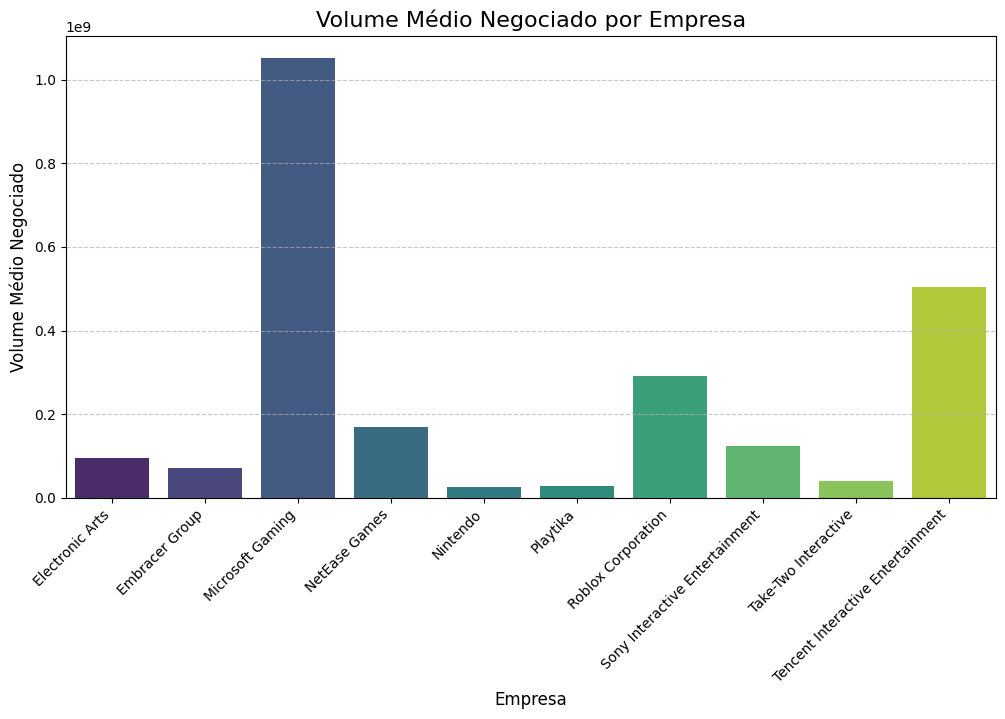

In [57]:
# Renomear a coluna
company_volume_stats.rename(columns={'Volume': 'Avg Volume'}, inplace=True)

# Volume médio negociado por empresa
plt.figure(figsize=(12, 6))
sns.barplot(x='Company', y='Avg Volume', data=company_volume_stats, palette='viridis')
plt.title('Volume Médio Negociado por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volume Médio Negociado', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

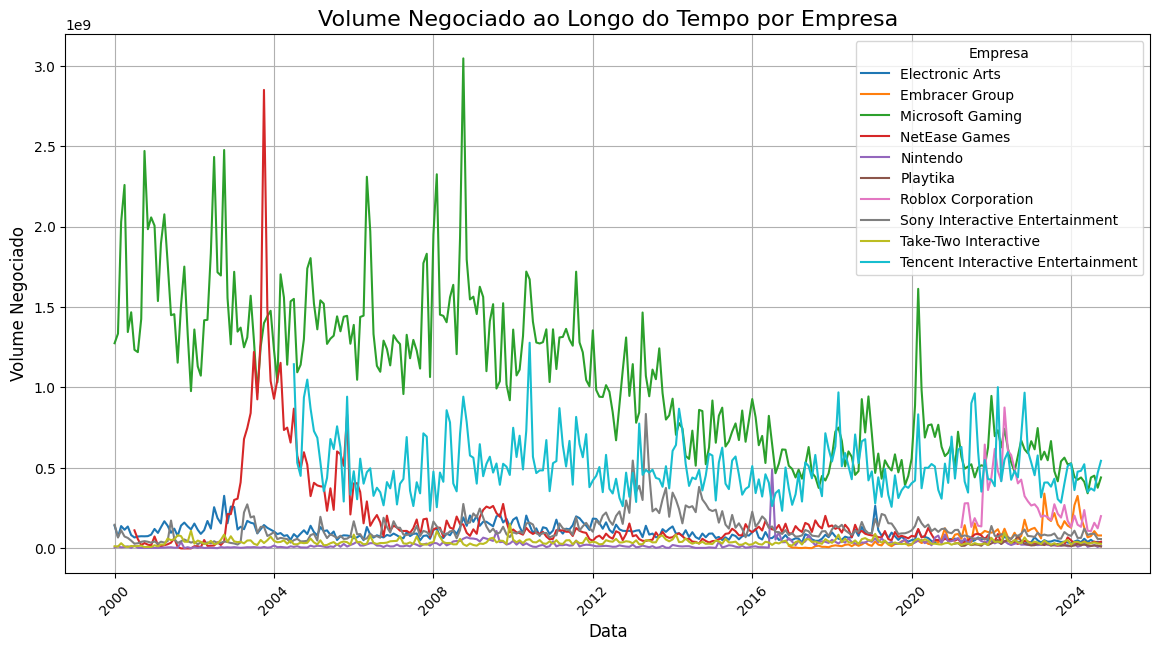

C:\Users\marco\AppData\Local\Temp\ipykernel_30388\485971652.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y='Volume', data=df, palette='magma')


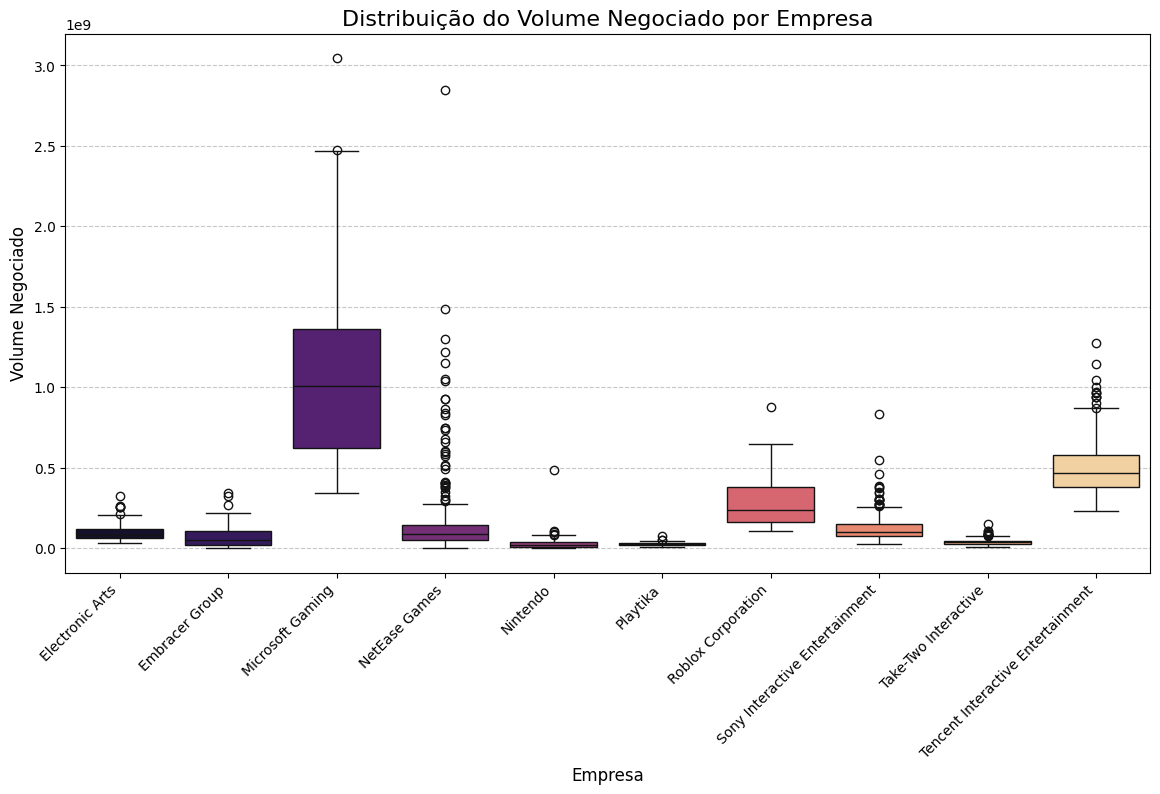

In [58]:
# Distribuicao do Volume Negociado ao Longo do Tempo (por empresa)
plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Volume'], label=company)

plt.title('Volume Negociado ao Longo do Tempo por Empresa', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Volume Negociado', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Comparacao da Distribuicao de Volume Negociado com Boxplot
plt.figure(figsize=(14, 7))
sns.boxplot(x='Company', y='Volume', data=df, palette='magma')
plt.title('Distribuição do Volume Negociado por Empresa', fontsize=16)
plt.xlabel('Empresa', fontsize=12)
plt.ylabel('Volume Negociado', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Analise de outliers

Outliers em 'Adj Close':
           Date                            Company Ticker Symbol Currency  \
1650 2018-05-01                    Electronic Arts            EA      USD   
1651 2018-06-01                    Electronic Arts            EA      USD   
1675 2020-06-01                    Electronic Arts            EA      USD   
1676 2020-07-01                    Electronic Arts            EA      USD   
1677 2020-08-01                    Electronic Arts            EA      USD   
...         ...                                ...           ...      ...   
537  2024-06-01  Tencent Interactive Entertainment       0700.HK      HKD   
538  2024-07-01  Tencent Interactive Entertainment       0700.HK      HKD   
539  2024-08-01  Tencent Interactive Entertainment       0700.HK      HKD   
540  2024-09-01  Tencent Interactive Entertainment       0700.HK      HKD   
541  2024-10-01  Tencent Interactive Entertainment       0700.HK      HKD   

            Open        High         Low       Clo

C:\Users\marco\AppData\Local\Temp\ipykernel_30388\850182983.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y=column, data=df, palette='coolwarm')


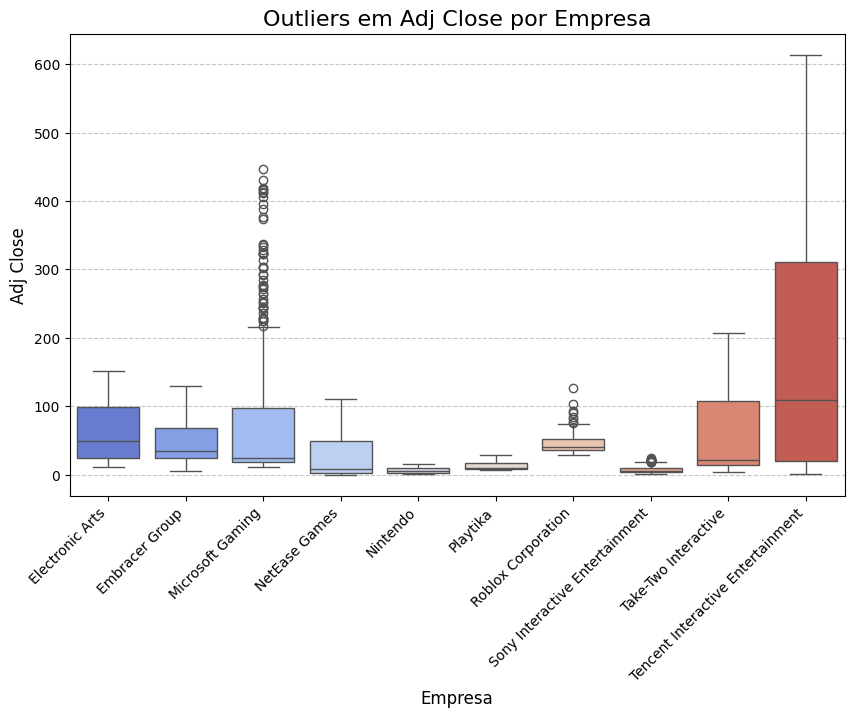

C:\Users\marco\AppData\Local\Temp\ipykernel_30388\850182983.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Company', y=column, data=df, palette='coolwarm')


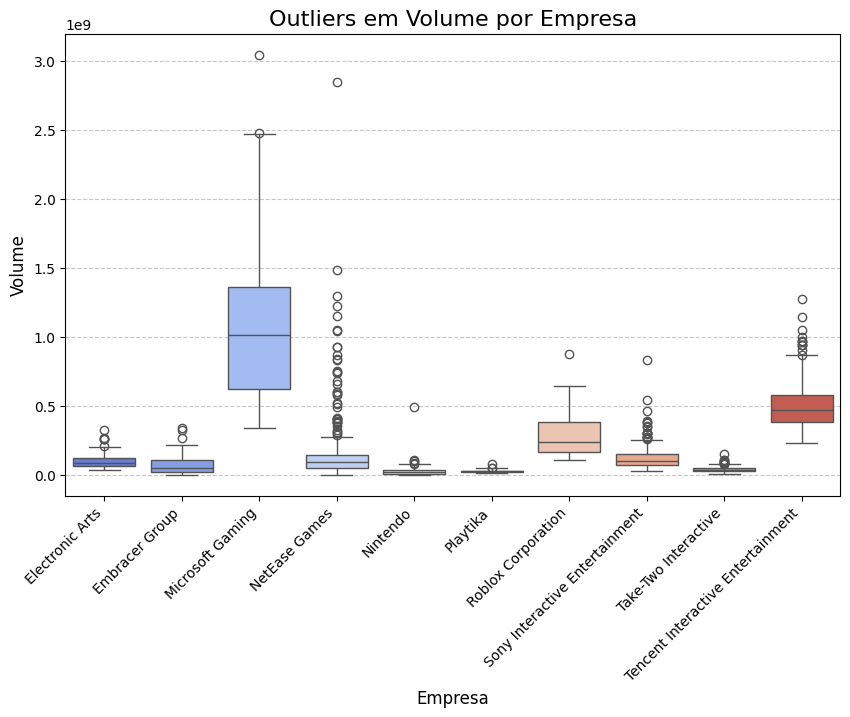

In [80]:
# Identificacao de Outliers usando IQR
def identify_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

def plot_outliers(df, column):
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Company', y=column, data=df, palette='coolwarm')
    plt.title(f'Outliers em {column} por Empresa', fontsize=16)
    plt.xlabel('Empresa', fontsize=12)
    plt.ylabel(column, fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

outliers_adj_close = identify_outliers(df, 'Adj Close')
outliers_volume = identify_outliers(df, 'Volume')

print("Outliers em 'Adj Close':")
print(outliers_adj_close)

print("\nOutliers em 'Volume':")
print(outliers_volume)

plot_outliers(df, 'Adj Close')
plot_outliers(df, 'Volume')

### Analise de retornos

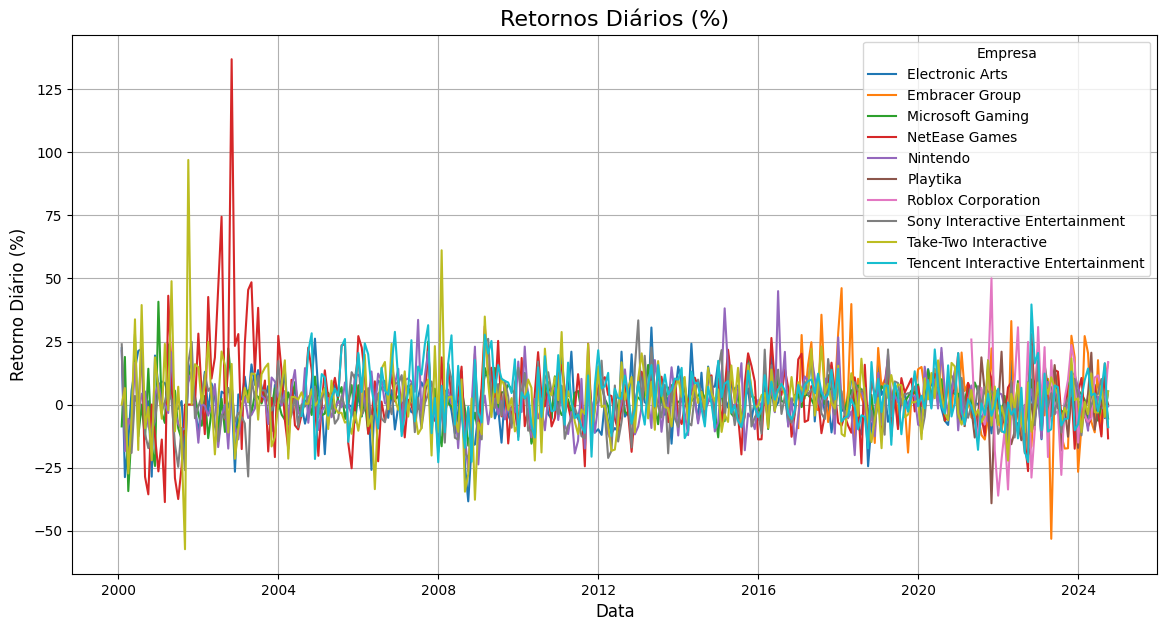

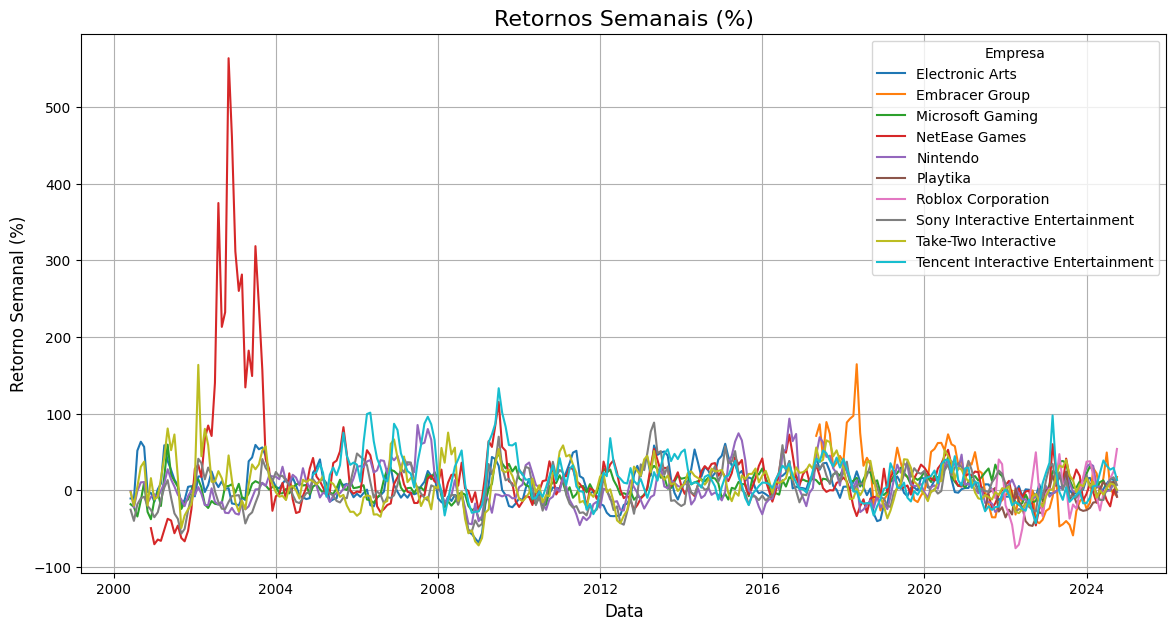

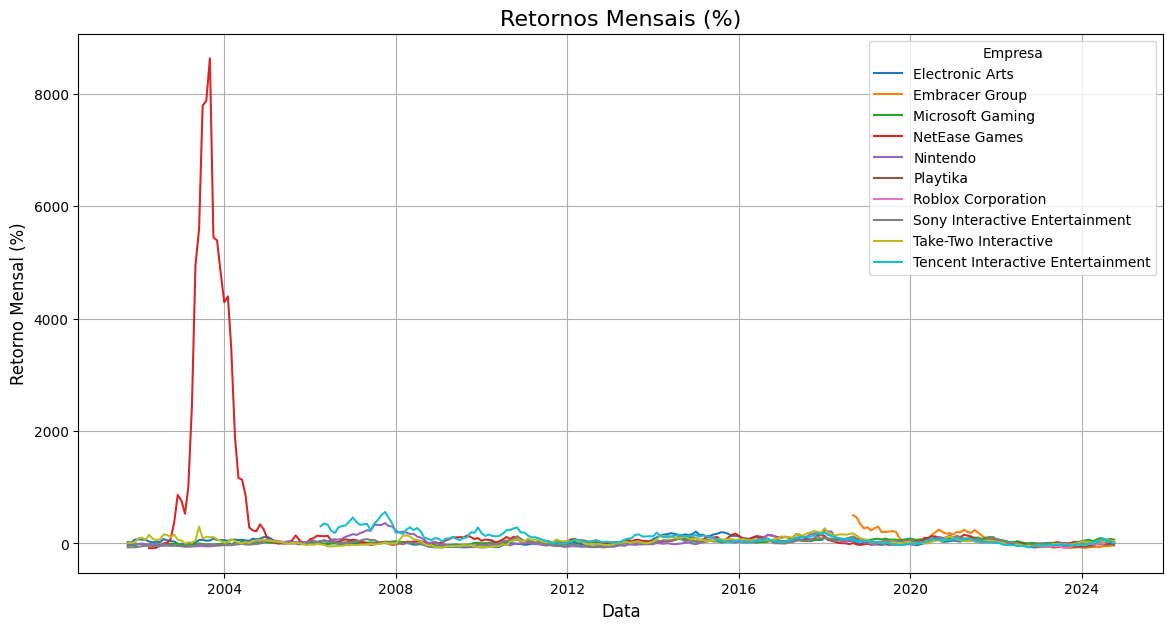

In [81]:
# Calcular Retornos Diários, Semanais e Mensais
df['Daily Return (%)'] = df.groupby('Company')['Adj Close'].pct_change() * 100
df['Weekly Return (%)'] = df.groupby('Company')['Adj Close'].pct_change(5) * 100
df['Monthly Return (%)'] = df.groupby('Company')['Adj Close'].pct_change(21) * 100

plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Daily Return (%)'], label=company)

plt.title('Retornos Diários (%)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Diário (%)', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Weekly Return (%)'], label=company)

plt.title('Retornos Semanais (%)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Semanal (%)', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.show()

plt.figure(figsize=(14, 7))
for company in df['Company'].unique():
    company_data = df[df['Company'] == company]
    plt.plot(company_data['Date'], company_data['Monthly Return (%)'], label=company)

plt.title('Retornos Mensais (%)', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Retorno Mensal (%)', fontsize=12)
plt.legend(title='Empresa')
plt.grid(True)
plt.show()

### Correlacao

In [59]:
correlation_matrix = df[['Adj Close', 'Volume', 'Daily Volatility']].corr()

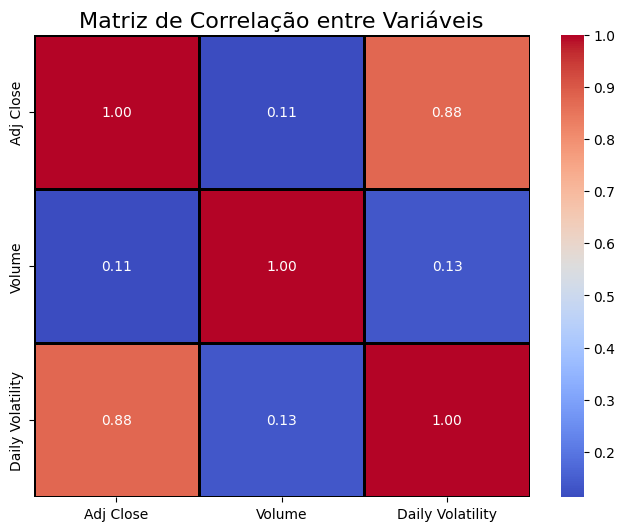

In [60]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=1, linecolor='black', cbar=True)
plt.title('Matriz de Correlação entre Variáveis', fontsize=16)
plt.show()

### Correlacao por Empresa

In [61]:
company_corr_stats = df.groupby('Company')[['Adj Close', 'Volume', 'Daily Volatility']].corr().reset_index()

In [62]:
sony_corr = company_corr_stats[company_corr_stats['Company'] == 'Sony Interactive Entertainment']
print(sony_corr)

                           Company           level_1  Adj Close    Volume  \
21  Sony Interactive Entertainment         Adj Close   1.000000 -0.327799   
22  Sony Interactive Entertainment            Volume  -0.327799  1.000000   
23  Sony Interactive Entertainment  Daily Volatility   0.568513 -0.188332   

    Daily Volatility  
21          0.568513  
22         -0.188332  
23          1.000000  


In [63]:
Tencent_corr = company_corr_stats[company_corr_stats['Company'] == 'Tencent Interactive Entertainment']
print(Tencent_corr)

                              Company           level_1  Adj Close    Volume  \
27  Tencent Interactive Entertainment         Adj Close   1.000000 -0.080901   
28  Tencent Interactive Entertainment            Volume  -0.080901  1.000000   
29  Tencent Interactive Entertainment  Daily Volatility   0.865495  0.142945   

    Daily Volatility  
27          0.865495  
28          0.142945  
29          1.000000  


In [64]:
Microsoft_corr = company_corr_stats[company_corr_stats['Company'] == 'Microsoft Gaming']
print(Microsoft_corr)

            Company           level_1  Adj Close    Volume  Daily Volatility
6  Microsoft Gaming         Adj Close   1.000000 -0.585971          0.906497
7  Microsoft Gaming            Volume  -0.585971  1.000000         -0.418664
8  Microsoft Gaming  Daily Volatility   0.906497 -0.418664          1.000000


## Implementacao de Modelo Nao Supervisionado

In [65]:
df['Daily Volatility'] = (df['High'] - df['Low']) / df['Open']

features = df[['Adj Close', 'Volume', 'Daily Volatility']]

In [ ]:
# Normalizacao
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [ ]:
#KMeans com 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
df['KMeans Cluster'] = kmeans.fit_predict(scaled_features)

df.head()


,Date,Company,Ticker Symbol,Currency,Open,High,Low,Close,Adj Close,Volume,Monthly Return (%),Daily Volatility,Rolling Volatility (30 days),KMeans Cluster
1430,2000-01-01,Electronic Arts,EA,USD,21.25000,28.765625,16.968750,20.437500,19.989416,140837600,NaN,0.555147,NaN,0
1431,2000-02-01,Electronic Arts,EA,USD,20.46875,25.562500,18.750000,25.000000,24.451891,70948000,22.324188,0.332824,NaN,0
1432,2000-03-01,Electronic Arts,EA,USD,23.75000,26.125000,17.062500,17.796875,17.406679,138755600,-28.812544,0.381579,NaN,0
1433,2000-04-01,Electronic Arts,EA,USD,18.00000,18.031250,12.671875,15.125000,14.793389,115839200,-15.013144,0.297743,NaN,0
1434,2000-05-01,Electronic Arts,EA,USD,15.00000,16.968750,12.250000,15.968750,15.618642,135958000,5.578522,0.314583,NaN,0


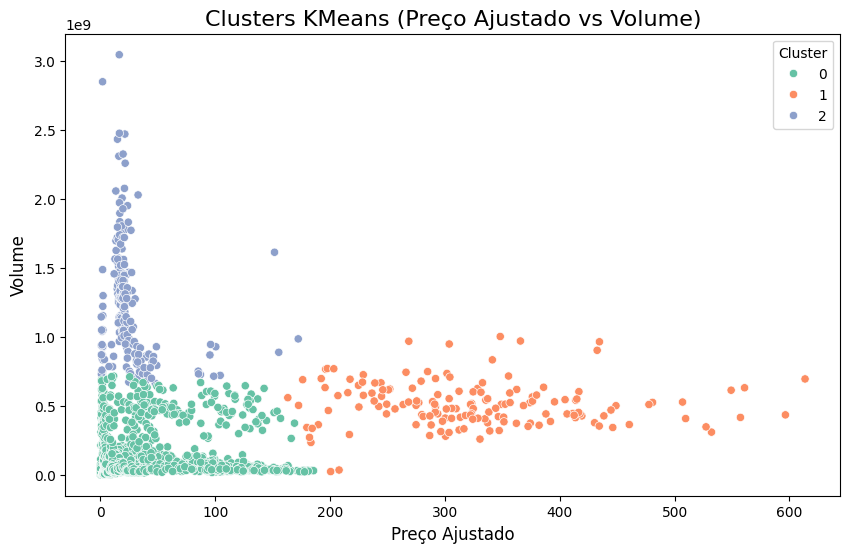

In [68]:
# Visualizando os clusters no gráfico
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', hue='KMeans Cluster', palette='Set2', data=df)
plt.title('Clusters KMeans (Preço Ajustado vs Volume)', fontsize=16)
plt.xlabel('Preço Ajustado', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(title='Cluster')
plt.show()

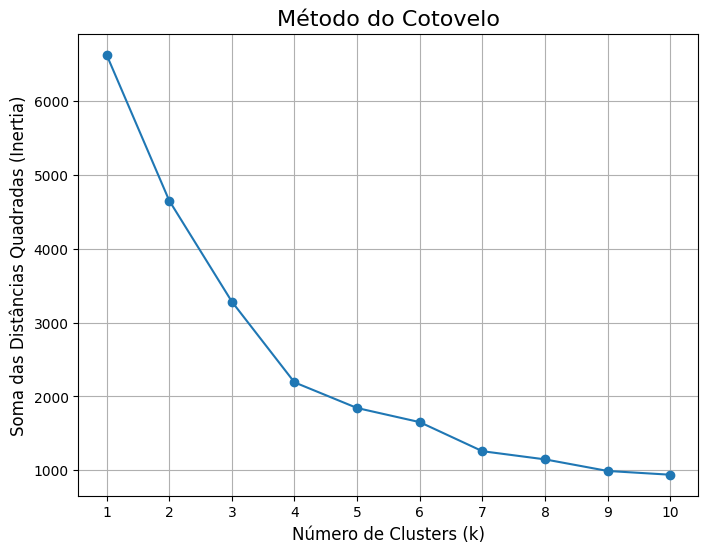

In [74]:
# Listar os valores de k de 1 até 10
inertia = []
k_range = range(1, 11)

# Calcular a soma das distancias quadradas dentro dos clusters para cada valor de k
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 6))
plt.plot(k_range, inertia, marker='o')
plt.title('Método do Cotovelo', fontsize=16)
plt.xlabel('Número de Clusters (k)', fontsize=12)
plt.ylabel('Soma das Distâncias Quadradas (Inertia)', fontsize=12)
plt.xticks(k_range)
plt.grid(True)
plt.show()


In [ ]:
# Calcular as médias das variáveis por cluster
cluster_means = df.groupby('KMeans Cluster')[['Adj Close', 'Volume', 'Daily Volatility']].mean()
print(cluster_means)


                 Adj Close        Volume  Daily Volatility
KMeans Cluster                                            
0                34.939270  1.204955e+08          0.181031
1               325.805678  5.125003e+08          0.137770
2                24.578575  1.255536e+09          0.149652


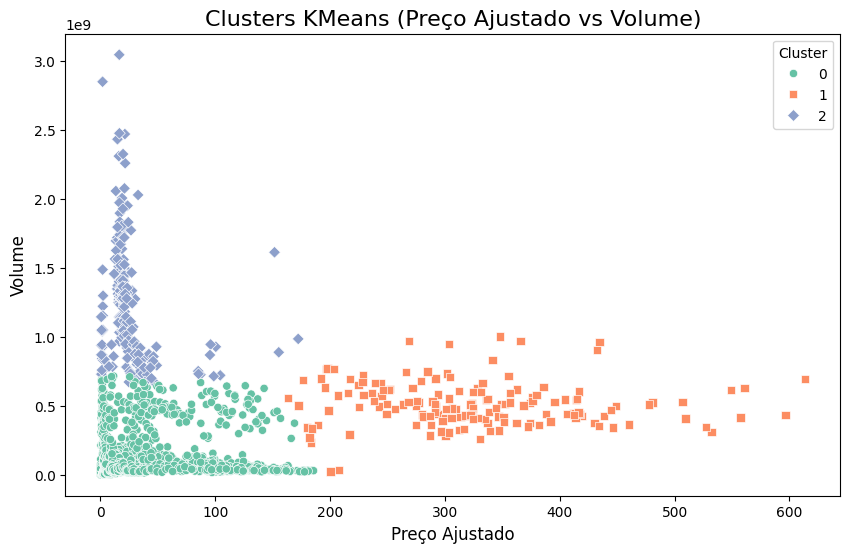

In [ ]:
# Visualizar os clusters com as etiquetas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Adj Close', y='Volume', hue='KMeans Cluster', palette='Set2', data=df, style='KMeans Cluster', markers=['o', 's', 'D'])
plt.title('Clusters KMeans (Preço Ajustado vs Volume)', fontsize=16)
plt.xlabel('Preço Ajustado', fontsize=12)
plt.ylabel('Volume', fontsize=12)
plt.legend(title='Cluster', loc='upper right')
plt.show()
